# Introducción al Método de Elementos Finitos
## Trabajo práctico 1



Utilice una malla uniforme de tres elementos finitos para resolver la ecuación diferencial:

$$
\frac{d^2u}{dx^2} + 4u = x^2
$$

$$
0<x<1
$$

Condiciones de contorno:

a. $u(0) = 0$, $u(1)=0$

b. $u(0) = 0$, $u'(1)=0$




Genericamente teníamos:

$$
- a \frac{d^2 u}{dx^2} + cu - h = 0
$$

$a = 1$

$c = 4$

$h = x^2$



Lo que tenemos (matricialmente) es:

 $$
 K U = f - T 
 $$
 
 Por lo tanto, tenemos que calcular 
 
 $$
 U = K^{-1} (f-T)
 $$
 
 Pero primero, la solución analística
 
 
 # Primera duda: qué valor tienen las constantes A y B?

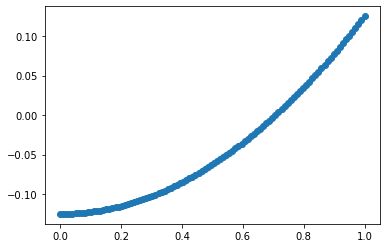

In [40]:
import numpy as np
import matplotlib.pyplot as plt

A = 1
B = 1

x = np.linspace(0,1,100)
y = A*np.cos(2*x) + B*np.sin(2*x) + 1/4*x**2 - 1/8

plt.plot(x,y, '-o')
plt.show()

Ahora construimos la matriz $K$ y el vector $f$

La matriz $K$ es igual a la vista en clase ya que utilizamos dos nodos en cada elemento. Lo que varían es la cantidad de elementos utilizados. 

En cambio dado que el parámetro anteriormente denominado $h$ no es constante, se debe calcular la matriz $f^e$ de cada elemento para luego obtener el vector $f$.

$$ 
f_1 = \frac{1}{L^e} [\frac{x_B}{3} x^3 -\frac{1}{4} x^4] 
$$

$$ 
f_2 = \frac{1}{L^e} [\frac{1}{4} x^4 - \frac{x_A}{3} x^3] 
$$


In [41]:
nelementos = 3 # Cantidad total de elementos
nodos_x_elem = 2
nnodos = (nodos_x_elem-1)*nelementos+1 # Cantidad total de nodos

L = 1.0 # longitud total del dominio
L_e = L/nelementos # longitud de un elemento

#     k_conduc = 1.0 # k = a ; c = 0;
#     H = 16.0*k_conduc # H/k = 16.0;
#     t0 = 50.0
#     tl = 10.0

#     #coorx = [0.0 l_e 2*l_e 3*l_e 4*l_e];
coorx = []
for i in range(nnodos):
    coorx.append(i*L_e)


k = -1/L_e * np.array([[ 1, -1,  0,  0],
                     [-1,  2, -1,  0],
                     [ 0, -1,  2, -1],
                     [ 0,  0,  -1,  1]])


f1s = []
f2s = []
for i in range(nelementos):
    x_A = coorx[i]
    x_B = coorx[i+1]
    
    f1_x_A = 1/L_e * np.array([x_B/3*x_A**3 - 1/4*x_A**4])
    f1_x_B = 1/L_e * np.array([x_B/3*x_B**3 - 1/4*x_B**4])
    f1 = f1_x_B - f1_x_A
    
    
    f2_x_A = 1/L_e * np.array([1/4*x_A**4 - x_B/3*x_B**3])
    f2_x_B = 1/L_e * np.array([1/4*x_B**4 - x_B/3*x_B**3])
    f2 = f2_x_B - f2_x_A

    f1s.append(f1)
    f2s.append(f2)

Ahora sí busco el vector $U$

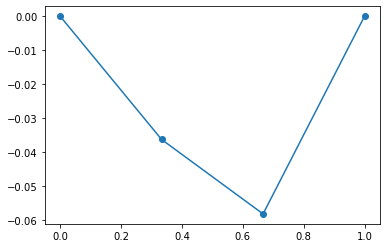

In [42]:
f = np.array([f1s[0], f1s[1] + f2s[0], f1s[2] + f2s[1], f2s[2]])

u = np.zeros((nnodos, 1))
u[1:-1] = np.dot(np.linalg.inv(k[1:-1, 1:-1]), f[1:-1])

# u1 y u5 son datos conocidos
u[0] = 0
u[-1] = 0

# Calculo q1 y q5
q = np.zeros((nnodos, 1))
q[0] = np.dot(k[0], u) - f[0]
q[-1] = np.dot(k[-1], u) - f[-1]


plt.plot(coorx, u, 'o-')
# plt.plot(x,y, '-o')

plt.show()

No mirar, esto era para hacer un poco las ecuaciones 

### e = 1

$K_{11}^{1} U_{1} + K_{12}^{1} U_{2} = f_{1}^{1} + Q_{1}^{1}$

$K_{21}^{1} U_{1} + K_{22}^{1} U_{2} = f_{2}^{1} + Q_{2}^{1}$


###e = 2

$K_{11}^{2} U_{2} + K_{12}^{2} U_{3} = f_{1}^{2} + Q_{1}^{2}$

$K_{21}^{2} U_{2} + K_{22}^{2} U_{3} = f_{2}^{2} + Q_{2}^{2}$



###e = 1

$K_{11}^{3} U_{3} + K_{}^{} U_{} = f_{}^{} + Q_{}^{}$

$K_{}^{} U_{} + K_{}^{} U_{} = f_{}^{} + Q_{}^{}$




#### nodo 1

$K_{11}^1 U_{1} + K_{12}^1 U_2 = f_1 + Q_1$

#### nodo 2
$K_{21}^{1} U_{1} + (K_{22}^{1} + K_{11}^{2}) U_{2} + K_{12}^{3} U_{3} = (f_{2}^{1} + f_{1}^{2}) + (Q_{2}^{1} + Q_{1}^{2})$


#### nodo 3
$K_{21}^2 U_{2} + K_{22}^2 U_3 = f_3 + Q_3$

